**<center><font size = "6">Support Vector Machine Classifier<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span></li><li><span><a href="#Visualización-de-resultados" data-toc-modified-id="Visualización-de-resultados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualización de resultados</a></span></li><li><span><a href="#Demo" data-toc-modified-id="Demo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demo</a></span></li></ul></div>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle
X_train_smt = pickle.load(open("saved_feats/ShuffleSplit_X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/ShuffleSplit_X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/ShuffleSplit_y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/ShuffleSplit_y_test", "rb"))
data_text = pickle.load(open("saved_feats/data_text", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

## Entrenamiento del modelo

Para ver el estudio realizado de la elección de mejores hierparametros, consulta el siguiente notebook: [Parameters_SVM](./Parameters_SVM.ipynb)

In [2]:
clf_svc = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                      fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93}, verbose=0, random_state=None, max_iter=1000)
clf_svc.fit(X_train_smt, y_train_smt)
pred_svc = clf_svc.predict(X_test)
estim_prob_svc = np.array(clf_svc.decision_function(
    X_test))  # decision is a voting function
pred_prob_svc = np.exp(estim_prob_svc)/np.sum(np.exp(estim_prob_svc),
                                                  axis=1, keepdims=True)  # softmax after the voting

## Visualización de resultados

In [3]:
print('Predicted classes:', clf_svc.classes_)
print('Average accuracy :', np.mean(pred_svc == y_test)*100)
print('Train accuracy :', (clf_svc.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_svc.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_svc))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_svc))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 88.5724784126401
Train accuracy : 97.51133451606545
Test accuracy : 88.5724784126401

 CONFUSION MATRIX
[[  48   28   43]
 [  34   85  131]
 [  69  317 4688]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.32      0.40      0.36       119
     Neutral       0.20      0.34      0.25       250
    Positive       0.96      0.92      0.94      5074

    accuracy                           0.89      5443
   macro avg       0.49      0.56      0.52      5443
weighted avg       0.91      0.89      0.90      5443



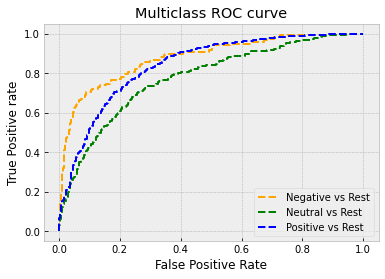

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_svc[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_svc[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_svc[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

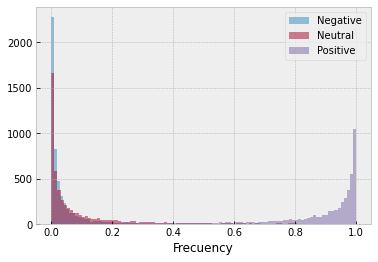

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(pred_prob_svc[:, 0], 100, alpha=0.5, label="Negative")
ax.hist(pred_prob_svc[:, 1], 100, alpha=0.5, label="Neutral")
ax.hist(pred_prob_svc[:, 2], 100, alpha=0.5, label="Positive")
ax.set_xlabel('Probability')
ax.set_xlabel('Frecuency')
ax.legend(prop={'size': 10})

/tmp/ipykernel_61861/878502397.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


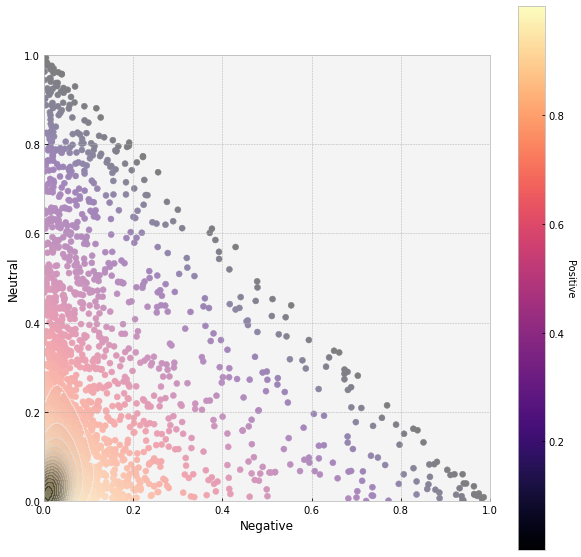

In [6]:
x = pred_prob_svc[:, 0]
y = pred_prob_svc[:, 1]
z = pred_prob_svc[:, 2]
cmap = plt.get_cmap('magma')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
plt.scatter(x, y, c=z, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Positive', rotation=270, fontsize=10, labelpad=10.0)
ax.set_aspect('equal', adjustable='box')
#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

xx, yy = np.mgrid[0:1:100j, 0:1:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

plt.contourf(xx, yy, f, levels=20, cmap=plt.get_cmap('Greys'), alpha=0.5)
plt.show()

## Demo

In [7]:
# CountVectorizer followed by TfidfTransformer
tfidf = TfidfVectorizer(use_idf=True, norm='l2',
                        smooth_idf=True, sublinear_tf=False, max_features=5000)
tfidf.fit_transform(data_text)

# Input sentence
text = input("Enter sentence: ")
arr_text = np.array([text])
tfidf_arr_text = tfidf.transform(arr_text)

# Output
print(clf_svc.predict(tfidf_arr_text))

Enter sentence: this product is ok
['Neutral']
